# Árvore de decisão


Ilustra o funcionamento do algoritmo de árvore de decisão com atributos numéricos.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula

-------------------------------------------------------------------------------

### Base de dados: Iris dataset (espécies de lírios)

https://archive.ics.uci.edu/ml/datasets/Iris/

3 classes (setosa, virginica, versicolor)

50 amostras por classe

4 atributos reais positivos (comp. pétala, comp. sépala, larg. pétala, larg. sépala)




In [1]:
!pip install pydotplus
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 878 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=c60f100dfa9ae3cae5f0b136c9ed77e2884cd35672c0a646c2efc49f54a7a2f4
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [2]:
import pandas as pd
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)



### Carga dos dados e particionamento das bases de treinamento e teste

<code>train_test_split(X, y) -- particiona a base de dados original em bases de treinamento e teste.</code>

Por padrão, 75% da base é utilizada para treinamento e 25% para testes. No código a seguir, são utilizados 15% para teste e 85% para treinamento.



In [3]:
# importa a base de dados iris
iris = datasets.load_iris()

X, y = iris.data, iris.target
class_names = iris.target_names

# Particiona a base de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15, stratify=y)



### Análise exploratória dos dados


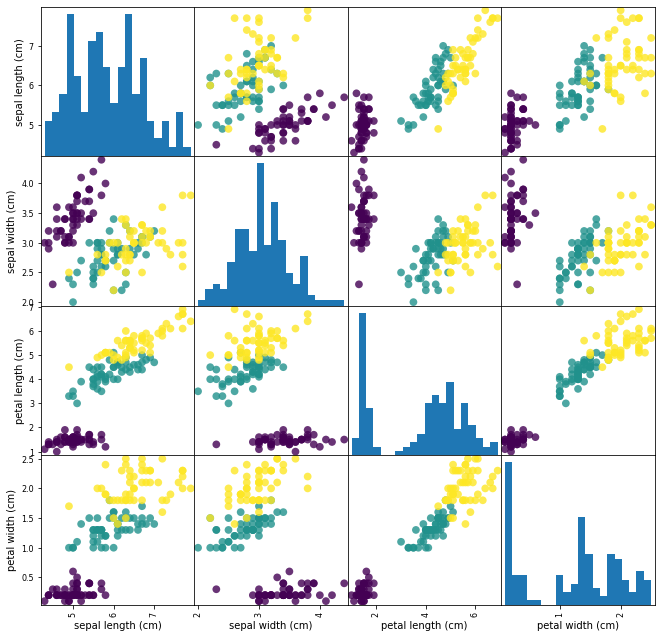

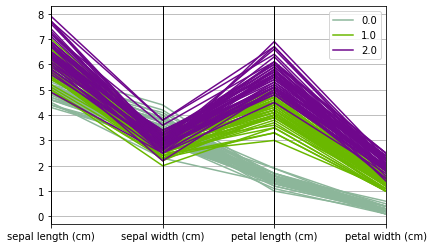

In [4]:
iris_dataframe = pd.DataFrame(np.c_[iris['data'], iris['target']], 
					columns=np.append(iris['feature_names'], 'target'))

ax2 = pd.plotting.scatter_matrix(iris_dataframe.iloc[:,:4], figsize=(11, 11), c=y, marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)

plt.figure()
ax3 = pd.plotting.parallel_coordinates(iris_dataframe, "target")

### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [5]:
tree_iris = DecisionTreeClassifier(random_state=0, criterion='entropy', class_weight={0: 1, 1: 1, 2: 1})
tree_iris = tree_iris.fit(X_train, y_train)
print("Acurácia (base de treinamento):", tree_iris.score(X_train, y_train))

y_pred = tree_iris.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=iris.target_names, columns=[x + "(prev)" for x in iris.target_names])
print(cnf_table)


Acurácia (base de treinamento): 1.0
Acurácia de previsão: 0.9565217391304348
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.86      0.92         7

    accuracy                           0.96        23
   macro avg       0.96      0.95      0.95        23
weighted avg       0.96      0.96      0.96        23

            setosa(prev)  versicolor(prev)  virginica(prev)
setosa                 8                 0                0
versicolor             0                 8                0
virginica              0                 1                6


### Exibição da árvore de decisão

In [6]:
from dtreeviz.trees import *

viz = dtreeviz(tree_iris,
              X_train,
              y_train,
              target_name="espécie",
              feature_names=iris.feature_names,
              class_names=["setosa", "versicolor", "virginica"])  

viz.view()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


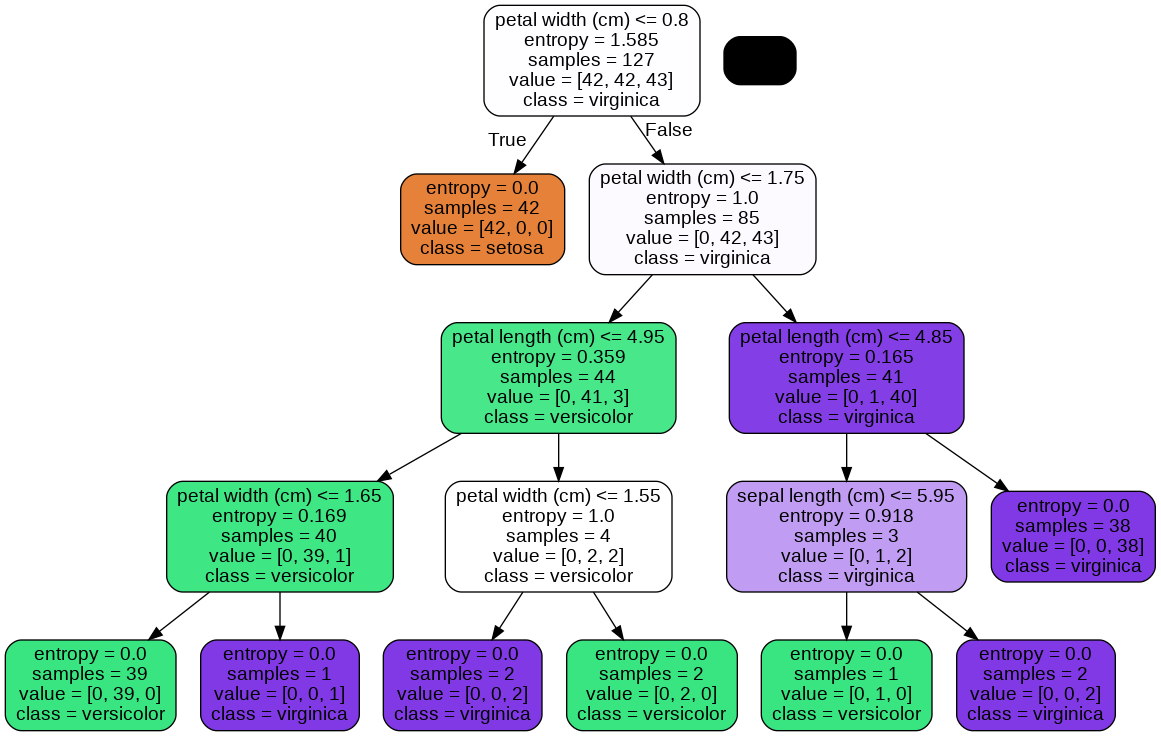

In [7]:
import pydotplus 
from IPython.display import Image
# Create DOT data
dot_data = tree.export_graphviz(tree_iris, out_file=None, 
                                #proportion=True,
                                rounded =True,
                                filled=True,
                                feature_names=iris.feature_names,  
                                class_names=["setosa", "versicolor", "virginica"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


In [8]:
list(zip(iris['feature_names'], tree_iris.feature_importances_))



[('sepal length (cm)', 0.013686916029808874),
 ('sepal width (cm)', 0.0),
 ('petal length (cm)', 0.045119755886153114),
 ('petal width (cm)', 0.941193328084038)]